### Perform Exploratory Data Analysis (EDA) on provided NYC Taxi dataset

The aim of this assignment is just to explore the dataset and generate insights from it. 

Here is the description of all the variables / features available in the dataset which will help you to perform EDA:

id - a unique identifier for each trip
vendor_id - a code indicating the provider associated with the trip record
pickup_datetime - date and time when the meter was engaged
dropoff_datetime - date and time when the meter was disengaged
passenger_count - the number of passengers in the vehicle (driver entered value)
pickup_longitude - the longitude where the meter was engaged
pickup_latitude - the latitude where the meter was engaged
dropoff_longitude - the longitude where the meter was disengaged
dropoff_latitude - the latitude where the meter was disengaged
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
trip_duration - (target) duration of the trip in seconds


#### Archit Pandya




#### Data Analysis steps

   - **1.** Imports and Read Data
   
       - Import Python libraries and load the data file to conduct data analysis
       
   - **2.** Data Understanding
   
       - Dataframe Shape
       - head and tail
       - Null or Missing Data
       - dtypes and describe
   
   - **3.** Data Preparation
       - Convert columns into appropriate datatypes
       - Renaming Columns if any
       - Feature Creation
       - Check Duplicates
       
   - **4.** Feature Understanding (Uniivariable Analysis)
       - Univariate Analysis (Categorical Features)
       - Univariate Analysis (Numerical Features)
           - Any potential Outliers
           - Plot Histogram
           - Plot KDE Plot
           - Plot Box Plot
   
   - **5.** Feature Realtionships (Bivariate Analysis)
   
       - Learn relationships between two variables and check out data relationships
       - Plot Scatterplot
       - Plot Heatmap Correlation
       - Plot Pairplot
   
   - **6.** Perform Multivariate Analysis
        - Groupby Comparisons
        - Check out GeoPandas Analysis
        
   - **6.** Perform Map Analysis
        - Plot Pickup and Dropoff locations and connect distance with a line

#### 1. Imports and Read and Data

In [1]:
# Import necessary Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [2]:
# Install 'haversine' library. This helps to find distance between two locations having Lat & Lon values.

!pip install haversine

In [3]:
from haversine import haversine, Unit

In [4]:
# Read NYC Tax trip duration data from the CSV file that is available from the same directory of this notebook

nyc_taxi_trip_df = pd.read_csv('data/nyc_taxi_trip_duration.csv')
nyc_taxi_trip_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


#### 2. Data Understanding

In [5]:
# Find row and column counts of the NYC dataframe

nyc_taxi_trip_df.shape

(729322, 11)

In [6]:
# Find any null values in the NYC dataframe

nyc_taxi_trip_df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
# Feature Names, Datatypes, Total Rows, Missing for each feature

nyc_taxi_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


**Findings** from above outputs

- No Missing Records in the loaded dataframe
- Check for duplicates
- Check Object and modif if needed
- Make datatype changes as per below:
    - id:                 values are alphanumeric. It can be Object data type
    - vendor_id:          It can be represented as Category
    - pickup_datetime:    It can be represented as datettime
    - dropoff_datetime:   It can be represented as datettime
    - passenger_count:    It can be represented as Integer
    - pickup_longitude:   It can be represented as float
    - pickup_latitude:    It can be represented as float
    - dropoff_longitude:  It can be represented as float
    - dropoff_latitude:   It can be represented as float
    - store_and_fwd_flag: It can be represented as Category
    - trip_duration:      It can be represented as Integer 

#### 3. Data Preparation

In [8]:
# Convert to Integer Datatypes

nyc_taxi_trip_df['passenger_count'] = nyc_taxi_trip_df['passenger_count'].astype('int64')
nyc_taxi_trip_df['trip_duration']   = nyc_taxi_trip_df['trip_duration'].astype('int64')

In [9]:
# Convert to Float Datatypes

nyc_taxi_trip_df['pickup_longitude']  = nyc_taxi_trip_df['pickup_longitude'].astype('float64')
nyc_taxi_trip_df['pickup_latitude']   = nyc_taxi_trip_df['pickup_latitude'].astype('float64')
nyc_taxi_trip_df['dropoff_longitude'] = nyc_taxi_trip_df['dropoff_longitude'].astype('float64')
nyc_taxi_trip_df['dropoff_latitude']  = nyc_taxi_trip_df['dropoff_latitude'].astype('float64')


In [10]:
# Modify "Pick Up and Dropoff Datetime" into useful Day, Week, Month and Year features

nyc_taxi_trip_df['pickup_datetime']   = pd.to_datetime(nyc_taxi_trip_df['pickup_datetime'], format= '%Y-%m-%d %H:%M:%S')
nyc_taxi_trip_df['dropoff_datetime']  = pd.to_datetime(nyc_taxi_trip_df['dropoff_datetime'], format= '%Y-%m-%d %H:%M:%S')
     
# Day of year
nyc_taxi_trip_df['doy_of_pickup']      = nyc_taxi_trip_df['pickup_datetime'].dt.dayofyear
nyc_taxi_trip_df['doy_of_dropoff']     = nyc_taxi_trip_df['dropoff_datetime'].dt.dayofyear

# Day of week
nyc_taxi_trip_df['dow_of_pickup']      = nyc_taxi_trip_df["pickup_datetime"].dt.dayofweek
nyc_taxi_trip_df['dow_of_dropoff']     = nyc_taxi_trip_df["dropoff_datetime"].dt.dayofweek

# Name of day 
nyc_taxi_trip_df['day_of_pickup']      = nyc_taxi_trip_df["pickup_datetime"].dt.day_name()
nyc_taxi_trip_df['day_of_dropoff']     = nyc_taxi_trip_df["dropoff_datetime"].dt.day_name()

# week of year
nyc_taxi_trip_df['woy_of_pickup']      = nyc_taxi_trip_df['pickup_datetime'].dt.isocalendar().week
nyc_taxi_trip_df['woy_of_dropoff']     = nyc_taxi_trip_df['dropoff_datetime'].dt.isocalendar().week

nyc_taxi_trip_df['is_pickup_weekday']  = nyc_taxi_trip_df['day_of_pickup'].map({'Monday': 'Y', 'Tuesday': 'Y', 'Wednesday': 'Y', 'Thursday': 'Y','Friday': 'Y', 'Saturday':'N', 'Sunday': 'N'})
nyc_taxi_trip_df['is_dropoff_weekday'] = nyc_taxi_trip_df['day_of_dropoff'].map({'Monday': 'Y', 'Tuesday': 'Y', 'Wednesday': 'Y', 'Thursday': 'Y','Friday': 'Y', 'Saturday':'N', 'Sunday': 'N'})

# month of year 
nyc_taxi_trip_df['moy_of_pickup']      = nyc_taxi_trip_df['pickup_datetime'].dt.month
nyc_taxi_trip_df['moy_of_dropoff']     = nyc_taxi_trip_df['dropoff_datetime'].dt.month

# Short Month of Year
nyc_taxi_trip_df['moy_pickup_short']   = nyc_taxi_trip_df['moy_of_pickup'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6:'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
nyc_taxi_trip_df['moy_dropoff_short']  = nyc_taxi_trip_df['moy_of_dropoff'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6:'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# day of week when last transaction was done isoweekday()
nyc_taxi_trip_df['dow_of_pickup']      = nyc_taxi_trip_df['pickup_datetime'].dt.isocalendar().day
nyc_taxi_trip_df['dow_of_dropoff']     = nyc_taxi_trip_df['dropoff_datetime'].dt.isocalendar().day

In [11]:
nyc_taxi_trip_df['year_pickup'] = nyc_taxi_trip_df['pickup_datetime'].dt.year.astype('category')
nyc_taxi_trip_df['year_mon_pickup'] = nyc_taxi_trip_df['year_pickup'].astype(str) + nyc_taxi_trip_df['moy_of_pickup'].astype(str)

In [12]:
# Convert to Category Datatype

nyc_taxi_trip_df['store_and_fwd_flag'] = nyc_taxi_trip_df['store_and_fwd_flag'].astype('category')
nyc_taxi_trip_df['is_pickup_weekday']  = nyc_taxi_trip_df['is_pickup_weekday'].astype('category')
nyc_taxi_trip_df['is_dropoff_weekday'] = nyc_taxi_trip_df['is_dropoff_weekday'].astype('category')
nyc_taxi_trip_df['moy_pickup_short']   = nyc_taxi_trip_df['moy_pickup_short'].astype('category')
nyc_taxi_trip_df['moy_dropoff_short']  = nyc_taxi_trip_df['moy_dropoff_short'].astype('category')
nyc_taxi_trip_df['day_of_dropoff']     = nyc_taxi_trip_df['day_of_dropoff'].astype('category')
nyc_taxi_trip_df['day_of_pickup']      = nyc_taxi_trip_df['day_of_pickup'].astype('category')
nyc_taxi_trip_df['vendor_id']          = nyc_taxi_trip_df['vendor_id'].astype('category')

print(nyc_taxi_trip_df.dtypes)

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
doy_of_pickup                  int32
doy_of_dropoff                 int32
dow_of_pickup                 UInt32
dow_of_dropoff                UInt32
day_of_pickup               category
day_of_dropoff              category
woy_of_pickup                 UInt32
woy_of_dropoff                UInt32
is_pickup_weekday           category
is_dropoff_weekday          category
moy_of_pickup                  int32
moy_of_dropoff                 int32
moy_pickup_short            category
moy_dropoff_short           category
year_pickup                 category
year_mon_pickup               object
d

In [13]:
# Create new column 'duration' by subtracting 'pickup_datetime' from 'dropoff_datetime'
# This is the computed column that can help identify any variances with the actual 'Trip Duration'

nyc_taxi_trip_df['duration'] = (nyc_taxi_trip_df['dropoff_datetime'] - nyc_taxi_trip_df['pickup_datetime']).astype("timedelta64[s]")
nyc_taxi_trip_df['duration'] = nyc_taxi_trip_df['duration'].dt.total_seconds().astype('int64')
nyc_taxi_trip_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,woy_of_dropoff,is_pickup_weekday,is_dropoff_weekday,moy_of_pickup,moy_of_dropoff,moy_pickup_short,moy_dropoff_short,year_pickup,year_mon_pickup,duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,9,Y,Y,2,2,Feb,Feb,2016,20162,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,10,Y,Y,3,3,Mar,Mar,2016,20163,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,7,N,N,2,2,Feb,Feb,2016,20162,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,Y,Y,1,1,Jan,Jan,2016,20161,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,7,Y,Y,2,2,Feb,Feb,2016,20162,848


In [14]:
# Calculate Distance betweeen Pickup and Dropoff Locations in miles
# Use haversine library function to compute the distance in Miles

def fn_compute_distance(row):
    """
    Function takes dataframe as input and computes the distance between
    Pickup and Dropoff location by using haversine functiona by passing 
    respective Pickup and Dropoff Latitude and Longitude
    
    Input: Dataframe
    Output: Distance in Miles
    """
    
    pickup_loc = (row['pickup_latitude'], row['pickup_longitude'])
    drop_loc   = (row['dropoff_latitude'], row['dropoff_longitude'])
    
    return haversine(pickup_loc, drop_loc, unit=Unit.MILES)


In [15]:
# Create new column 'distance_in_mile' by calliing 'fn_compute_distance' iteratively through entire dataframe

nyc_taxi_trip_df['distance_in_mile'] = nyc_taxi_trip_df.apply(lambda row: fn_compute_distance(row), axis = 1)

In [16]:
# Create a new column 'distance_range' based on 'distance_in_mile' to group distance

nyc_taxi_trip_df['distance_range'] = nyc_taxi_trip_df['distance_in_mile'].apply(lambda x: 'Long-Range' if x >= 350 else ('Mid-Range' if x >= 150 else ('Short-Range' if x >= 50 else 'Local')))
nyc_taxi_trip_df['distance_range'] = nyc_taxi_trip_df['distance_range'].astype('category')

In [17]:
nyc_taxi_trip_df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
doy_of_pickup                  int32
doy_of_dropoff                 int32
dow_of_pickup                 UInt32
dow_of_dropoff                UInt32
day_of_pickup               category
day_of_dropoff              category
woy_of_pickup                 UInt32
woy_of_dropoff                UInt32
is_pickup_weekday           category
is_dropoff_weekday          category
moy_of_pickup                  int32
moy_of_dropoff                 int32
moy_pickup_short            category
moy_dropoff_short           category
year_pickup                 category
year_mon_pickup               object
d

In [18]:
# No duplicates exist at the dataframe level

nyc_taxi_trip_df[nyc_taxi_trip_df.duplicated()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,is_dropoff_weekday,moy_of_pickup,moy_of_dropoff,moy_pickup_short,moy_dropoff_short,year_pickup,year_mon_pickup,duration,distance_in_mile,distance_range


#### 4.Feature Understanding (Uniivariable Analysis)

#### 4-a. Univariate analysis: Categorical Features

In [19]:
nyc_taxi_trip_df.select_dtypes(include = ['category', 'object']).dtypes

id                      object
vendor_id             category
store_and_fwd_flag    category
day_of_pickup         category
day_of_dropoff        category
is_pickup_weekday     category
is_dropoff_weekday    category
moy_pickup_short      category
moy_dropoff_short     category
year_pickup           category
year_mon_pickup         object
distance_range        category
dtype: object

In [20]:
# Create subgroup for Categorical Features

nyc_pickup_info = ['day_of_pickup', 'is_pickup_weekday', 'moy_pickup_short', 'store_and_fwd_flag']
nyc_pickup_day = ['is_pickup_weekday', 'day_of_pickup', 'year_mon_pickup', 'distance_range']

In [21]:
# Function to perform Univariate Analysis for Categorical Features

def fn_UVA_category(data, var_group):

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print the value_counts and barplot for max_categories.
    '''
    # setting figure_size
    col = 2
    size = len(var_group)
    fig, axes = plt.subplots(2,4,figsize=(16,12), facecolor='lightskyblue',layout='constrained')    
    max_categories = 10

    # for every variable
    for i in range(len(axes)):
        for j,k in enumerate(var_group):
            curr_row = var_group[j]
            # calculating descriptives of variable   
            norm_count = data[curr_row].value_counts(normalize = True)[:max_categories]
            n_uni = data[curr_row].nunique()

            #Plotting the variable with every information
#             plt.subplot(2, size, j+1)
            colors = sns.color_palette('pastel')
            if i == 0:
                plt.subplot(col, size, j + 1)
                sns.barplot(x=norm_count, y=norm_count.index , order = norm_count.index, ax = axes[i][j])
            else:
                plt.subplot(col, size, size + j + 1)
                palette_color = sns.color_palette('bright')
                plt.pie(norm_count, labels = norm_count.index, colors = palette_color, autopct='%.0f%%')        
            
            plt.xlabel('fraction/percent', fontsize = 15)
            plt.ylabel('{}'.format(i), fontsize = 15)
            plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni, norm_count))


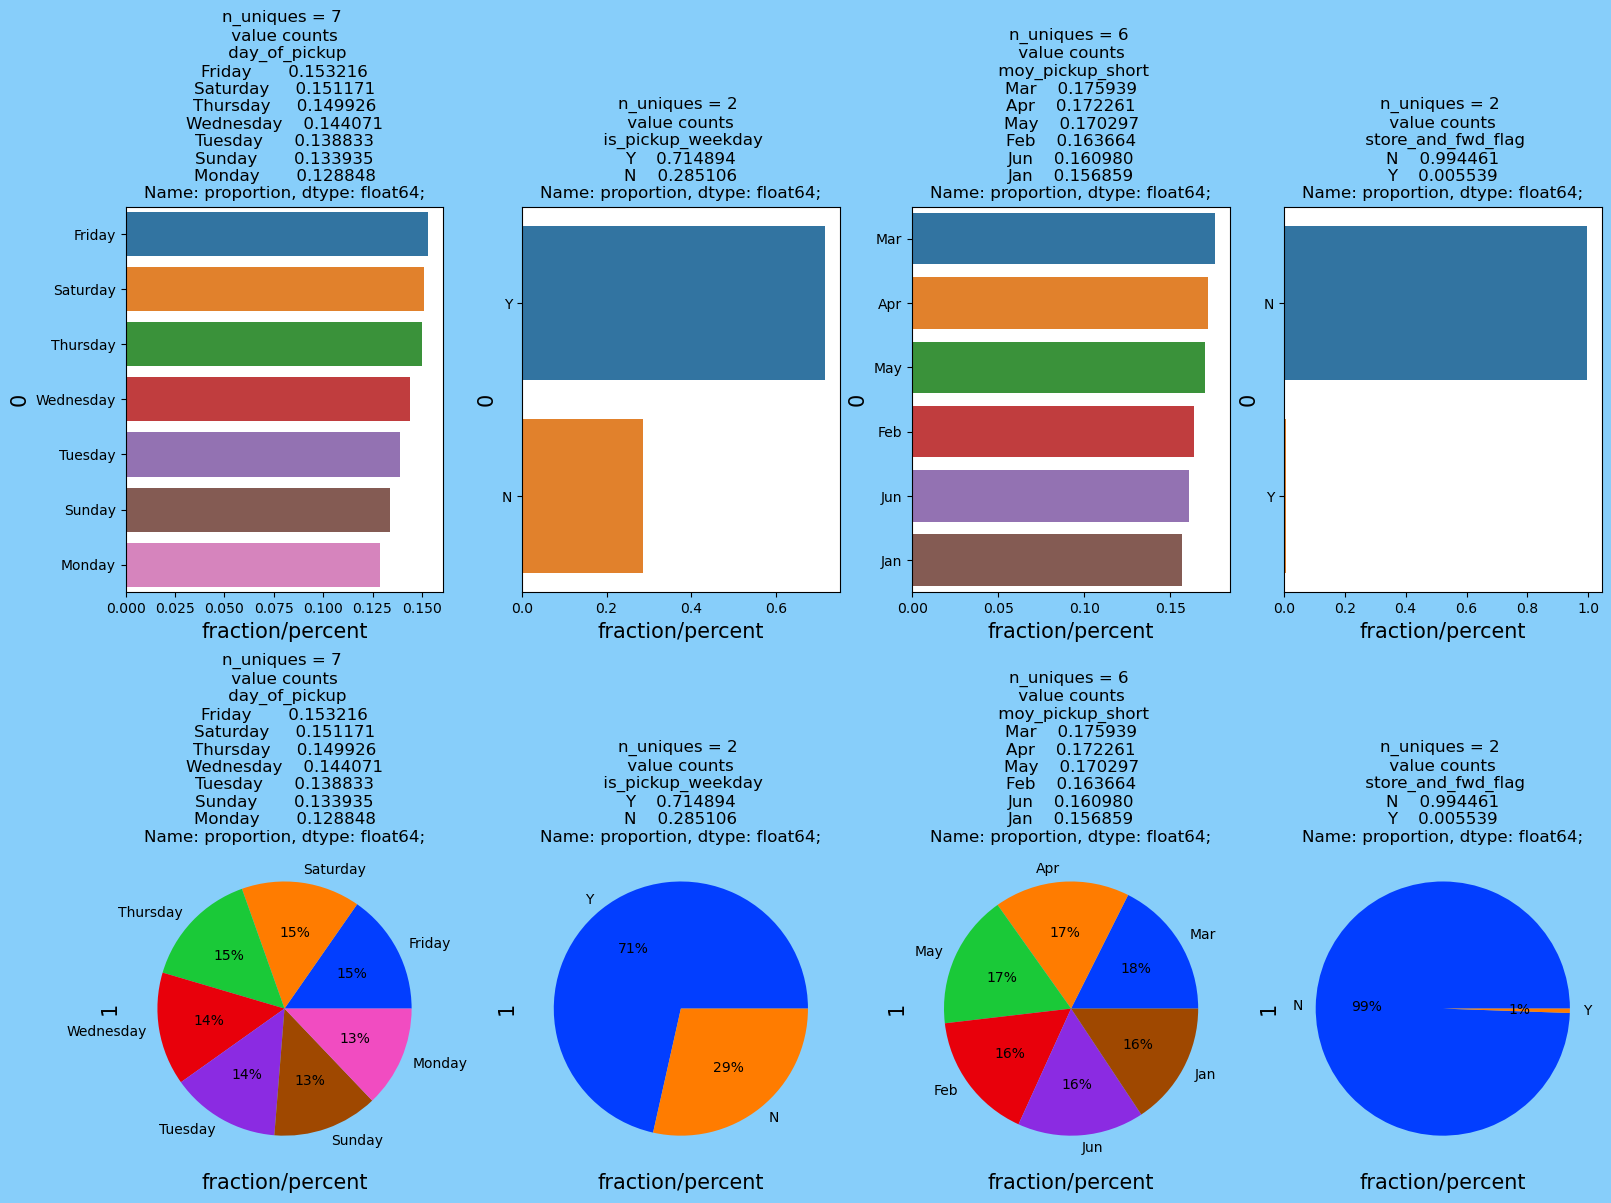

In [22]:
fn_UVA_category(nyc_taxi_trip_df, nyc_pickup_info)

####  Summary
- Day of Pickup
    - Friday seems to be the highest percent of pickup when compared with other days for this dataset
    - Monday seems to be the lowest perent of pickup when compared with other days for this dataset
- Weekday Pickup
    - Weekdays pickup seem to be almost two third when compared with weekend pickup
- Pick Up Month
    -  March seems to be the highest pickup month for this dataset
    - January seems to be the lowest pickup month for this dataset
- Store and Fwd Flag
    - Almost no trip information is stored per flag No perecent (0.994461)

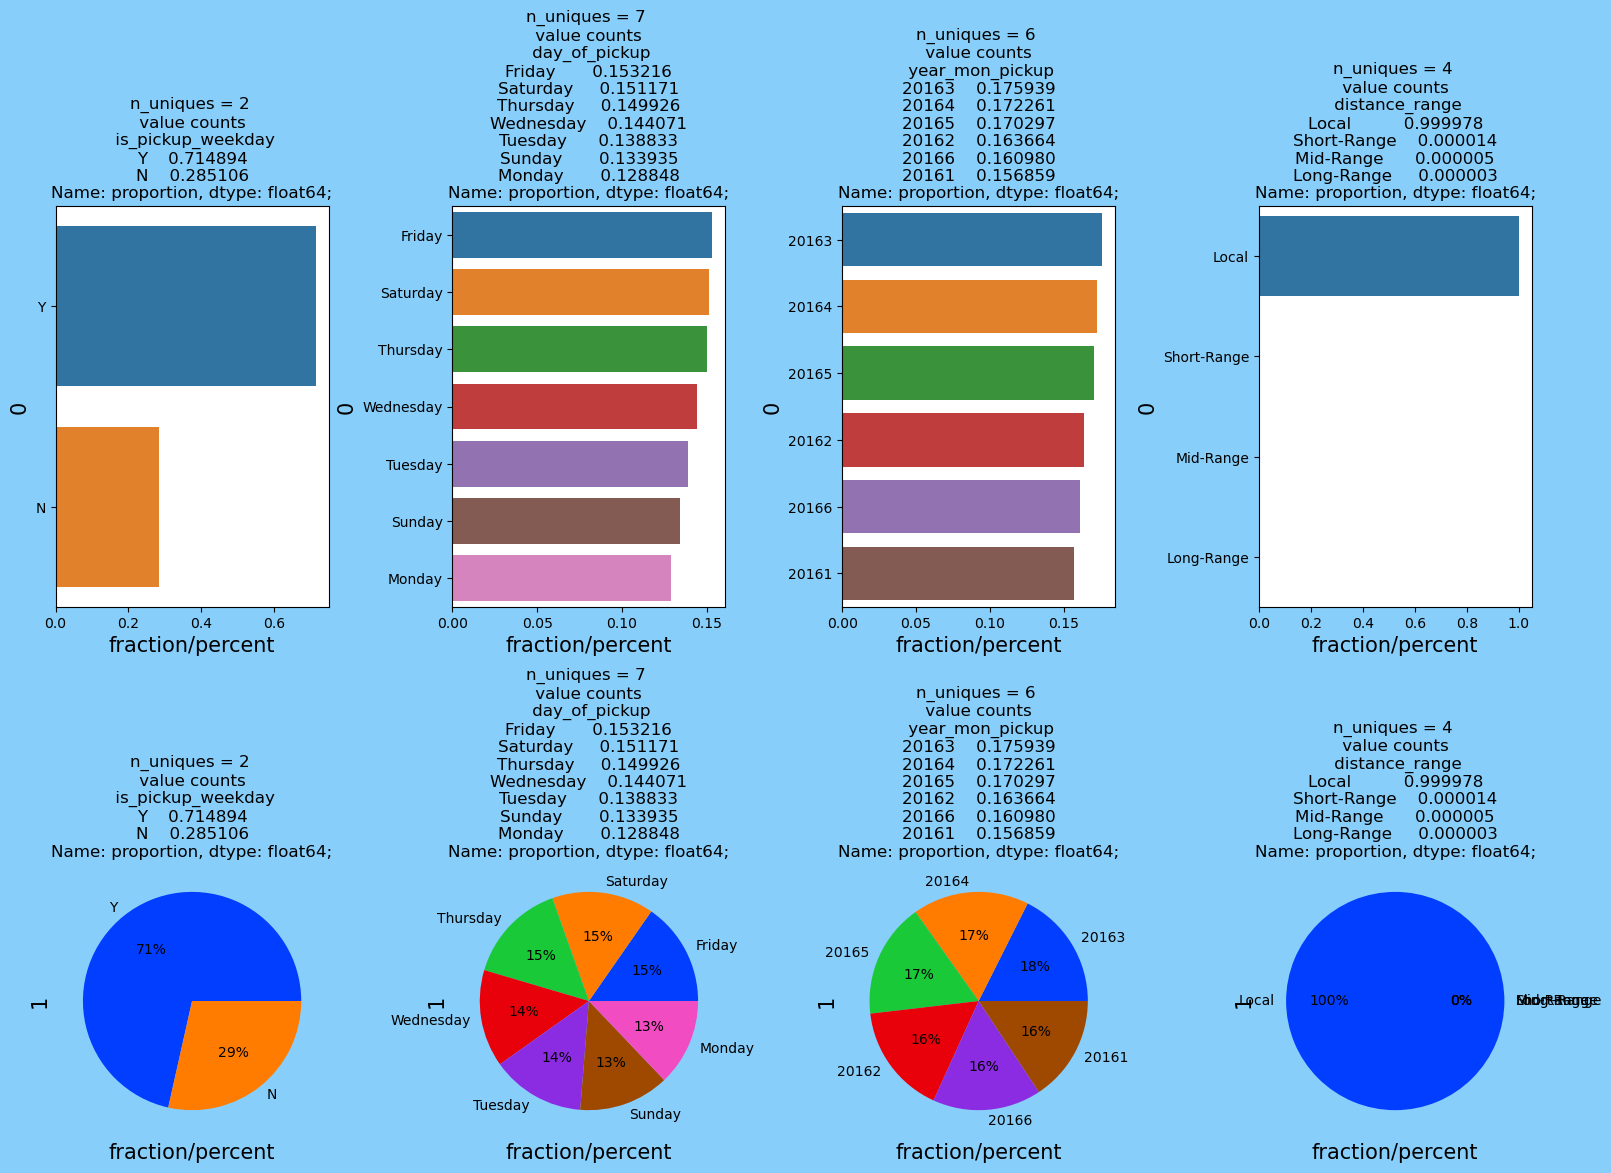

In [23]:
fn_UVA_category(nyc_taxi_trip_df, nyc_pickup_day)

####  Summary
- Is Pickup Weekday
    - Weekdays pick up are almost 70% or more
    - Monday seems to be the lowest perent of pickup when compared with other days for this dataset
- Day of Pickup
    - Friday seems to be the highest pickup rate
    - Monday seems to be the lowest pickup rate
- Pick Up Month
    -  March seems to be the highest pickup month for this dataset
    - January seems to be the lowest pickup month for this dataset
- Distance Range
    - The Local Range seems to be area for NYC Taxi (99.99%)
    - There are very few or negligible occurrences for the rest of Distance covered by NYC Taxi

#### 4-b. Univariate analysis: Numerical Features

In [ ]:
doy_of_pickup          int32
doy_of_dropoff         int32
dow_of_pickup         UInt32
dow_of_dropoff        UInt32
woy_of_pickup         UInt32
woy_of_dropoff        UInt32
moy_of_pickup          int32
moy_of_dropoff         int32
duration               int64

In [24]:
# Convert below Int featurs into Float to safeguard against runtime issues with KDE Plots

nyc_taxi_trip_df['doy_of_pickup'] = nyc_taxi_trip_df['doy_of_pickup'].astype(float)
nyc_taxi_trip_df['doy_of_dropoff'] = nyc_taxi_trip_df['doy_of_dropoff'].astype(float)
nyc_taxi_trip_df['dow_of_pickup'] = nyc_taxi_trip_df['dow_of_pickup'].astype(float)
nyc_taxi_trip_df['dow_of_dropoff'] = nyc_taxi_trip_df['dow_of_dropoff'].astype(float)
nyc_taxi_trip_df['woy_of_pickup'] = nyc_taxi_trip_df['woy_of_pickup'].astype(float)
nyc_taxi_trip_df['woy_of_dropoff'] = nyc_taxi_trip_df['woy_of_dropoff'].astype(float)
nyc_taxi_trip_df['moy_of_pickup'] = nyc_taxi_trip_df['moy_of_pickup'].astype(float)
nyc_taxi_trip_df['moy_of_dropoff'] = nyc_taxi_trip_df['moy_of_dropoff'].astype(float)
nyc_taxi_trip_df['trip_duration'] = nyc_taxi_trip_df['trip_duration'].astype(float)
nyc_taxi_trip_df['duration'] = nyc_taxi_trip_df['duration'].astype(float)

In [25]:
# Numerical features of loaded NYC Dataframe

nyc_taxi_trip_df.select_dtypes(include=['int64','int32','UInt32','float64','Int64']).dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration        float64
doy_of_pickup        float64
doy_of_dropoff       float64
dow_of_pickup        float64
dow_of_dropoff       float64
woy_of_pickup        float64
woy_of_dropoff       float64
moy_of_pickup        float64
moy_of_dropoff       float64
duration             float64
distance_in_mile     float64
dtype: object

In [33]:
# Segregate the numerical variables into subgroups

# pickup_dropoff_location = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
# pickup_dropoff_doyw     = ['doy_of_pickup', 'doy_of_dropoff', 'dow_of_pickup', 'dow_of_dropoff']

pickup_dropoff_woym     = ['woy_of_pickup', 'moy_of_pickup']
rest_misc_num_vars      = ['passenger_count', 'trip_duration', 'distance_in_mile']

In [27]:
# Function for analysis of numerical univariate

def fn_UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  print(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(x=data[i], fill=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "within 1 std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('within 1 std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

['woy_of_pickup', 'moy_of_pickup']


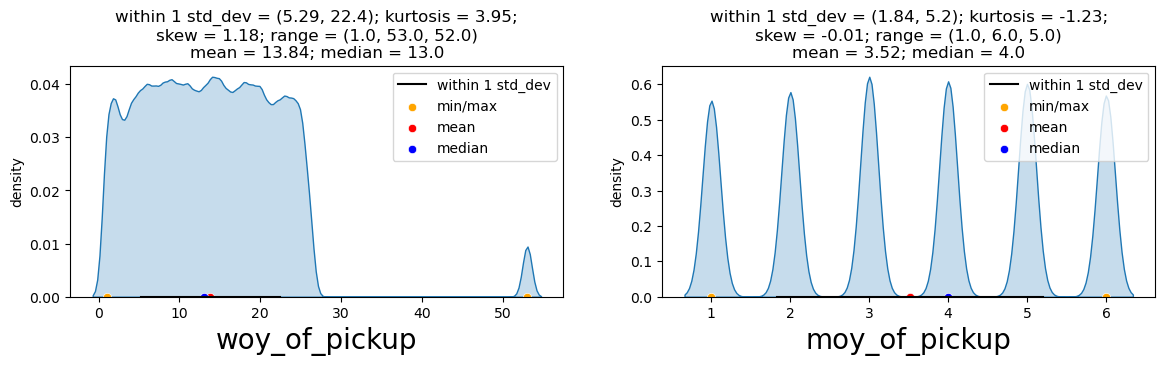

In [28]:
fn_UVA_numeric(nyc_taxi_trip_df, pickup_dropoff_woym)

####  Summary
- Week of Year Pickup
    - The most of he pick ups happened during week of 5-25
    - Monday seems to be the lowest perent of pickup when compared with other days for this dataset
- Month of Year Pickup
    - The March month seems to be having highest pickup density
    - There does not seem to be significally noticeable frequency density difference amongst given months

['passenger_count', 'trip_duration', 'distance_in_mile']


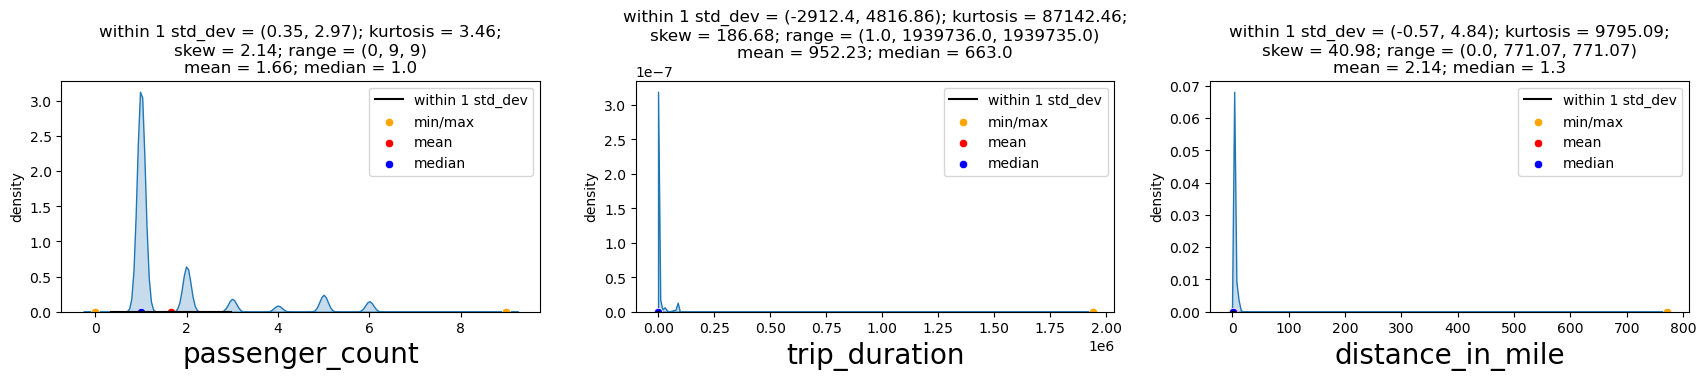

In [32]:
fn_UVA_numeric(nyc_taxi_trip_df, rest_misc_num_vars)

####  Summary
- Passenger Count
    - The highest frequency for passenger count is 1.
    - The highest passenger count seems to be 6
    - The frequency distribution drops significantly as the passenger counts increase
- Trip Duration
    - There seems to be short trip duration having most of the frequency density
- Distance in Mile
    - The most of the distance is aorund short range or up to 25 miles in range
    - There are no significant distributio found beyond 25 mile range 

#### 4-c. Univariate analysis: Any Potential Outliers

In [46]:
# custom function for easy outlier analysis

def fn_UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  print(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.xlabel(i)
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
#       # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(round(IQR,2), round(med,2), (round(quant25,2),round(quant75,2)), (outlier_low,outlier_high)))


['woy_of_pickup', 'moy_of_pickup']


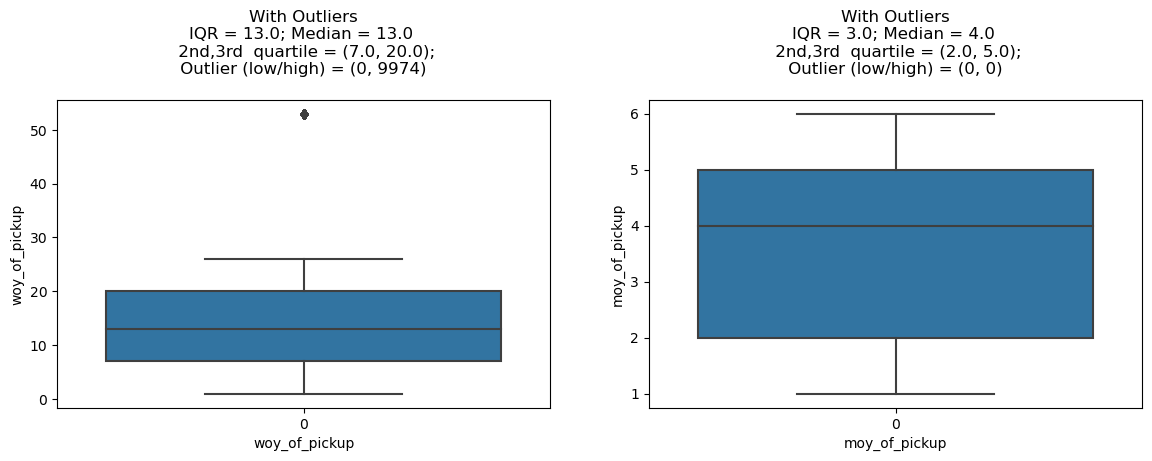

In [47]:
fn_UVA_outlier(nyc_taxi_trip_df, pickup_dropoff_woym)

####  Summary
- Week of Year
    - The most frequency range seem to be6 - 20 weeeks
    - There is an outlier values of 55 that needs to be evaluated
- Month of Year
    - The most frequency seem to be month 2 - 5
    - No outliers value observed

['passenger_count', 'trip_duration', 'distance_in_mile']


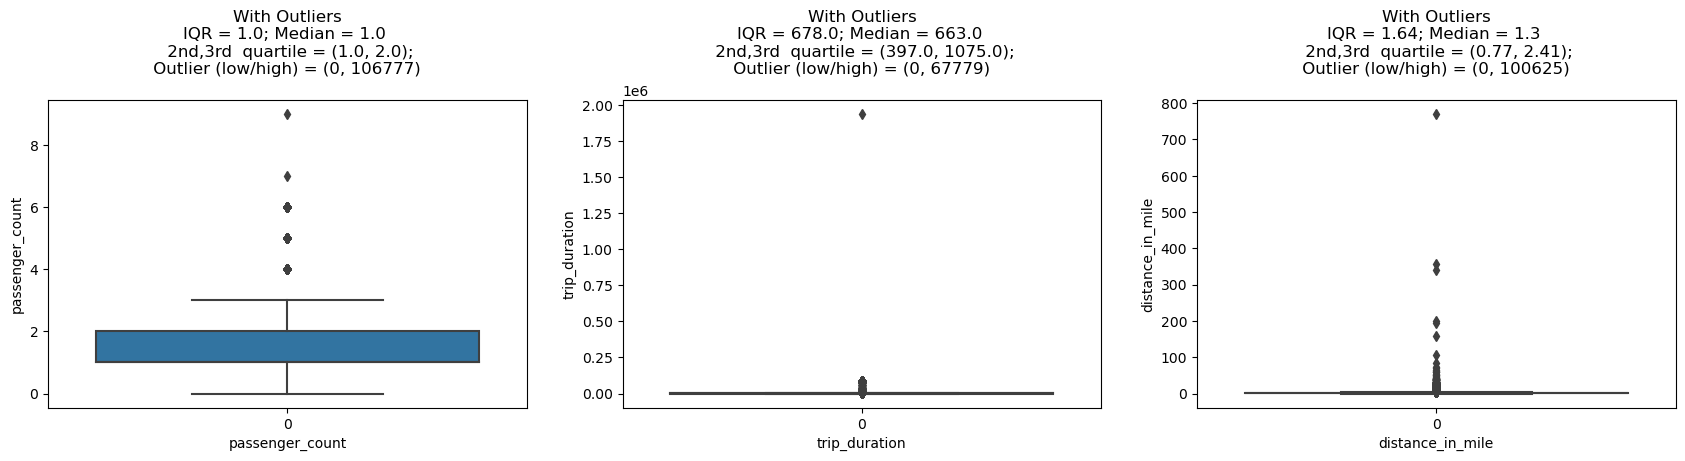

In [48]:
fn_UVA_outlier(nyc_taxi_trip_df, rest_misc_num_vars)

####  Summary
- Passenger Count
    - The highest frequency for passenger count is 1-2.
    - The other counts seem to appear as outlier or occurs in very low counts
- Trip Duration
    - There seems to be short trip duration having most of the frequency density
    - There are few occurences of having outlier
- Distance in Mile
    - The most of the distance is aorund 25 miles or shorter
    - The rest of the miles appear as outlier

#### 5. Feature Realtionships (Bivariate Analysis)

   #### 5.a Bivariate Analysis : Numerical-Numerical

In [51]:
nyc_taxi_trip_df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                float64
doy_of_pickup                float64
doy_of_dropoff               float64
dow_of_pickup                float64
dow_of_dropoff               float64
day_of_pickup               category
day_of_dropoff              category
woy_of_pickup                float64
woy_of_dropoff               float64
is_pickup_weekday           category
is_dropoff_weekday          category
moy_of_pickup                float64
moy_of_dropoff               float64
moy_pickup_short            category
moy_dropoff_short           category
year_pickup                 category
year_mon_pickup               object
d

In [52]:
numerical_features  = nyc_taxi_trip_df.select_dtypes(include = ['int64', 'float64', 'int32', 'UInt32'])
numeric_distance    = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'trip_duration', 'distance_in_mile']
numeric_day_of      = ['doy_of_pickup', 'doy_of_dropoff', 'dow_of_pickup', 'dow_of_dropoff', 'woy_of_pickup', 'moy_of_pickup', 'trip_duration']
numeric_vendor_info = ['vendor_id', 'passenger_count', 'pickup_longitude', 'trip_duration', 'distance_in_mile']
numerical_features.dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration        float64
doy_of_pickup        float64
doy_of_dropoff       float64
dow_of_pickup        float64
dow_of_dropoff       float64
woy_of_pickup        float64
woy_of_dropoff       float64
moy_of_pickup        float64
moy_of_dropoff       float64
duration             float64
distance_in_mile     float64
dtype: object

In [53]:
# Compute Correlation Matrix

correlation = numerical_features.corr()
correlation

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_of_pickup,doy_of_dropoff,dow_of_pickup,dow_of_dropoff,woy_of_pickup,woy_of_dropoff,moy_of_pickup,moy_of_dropoff,duration,distance_in_mile
passenger_count,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,-0.001182,-0.001168,0.025758,0.025941,0.005154,0.005114,-0.001481,-0.001497,0.013022,0.009175
pickup_longitude,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,0.003737,0.003764,-0.016031,-0.016846,0.006579,0.006509,0.004037,0.004090,0.035447,0.251482
pickup_latitude,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.001244,-0.001313,-0.029073,-0.029254,-0.004786,-0.004787,-0.000165,-0.000233,-0.038163,-0.128455
dropoff_longitude,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,0.003762,0.003787,-0.001473,-0.001396,0.005541,0.005554,0.003883,0.003923,0.020664,0.132353
dropoff_latitude,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.001627,-0.001673,-0.022028,-0.022396,-0.002402,-0.002406,-0.000580,-0.000621,-0.028283,-0.153760
trip_duration,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.009418,0.010285,-0.002302,-0.003369,0.007907,0.007072,0.009378,0.010135,1.000000,0.125772
doy_of_pickup,-0.001182,0.003737,-0.001244,0.003762,-0.001627,0.009418,1.000000,0.999998,-0.012497,-0.012225,0.713257,0.713902,0.985661,0.985660,0.009418,0.017201
doy_of_dropoff,-0.001168,0.003764,-0.001313,0.003787,-0.001673,0.010285,0.999998,1.000000,-0.012473,-0.012163,0.713256,0.713898,0.985659,0.985661,0.010285,0.017334
dow_of_pickup,0.025758,-0.016031,-0.029073,-0.001473,-0.022028,-0.002302,-0.012497,-0.012473,1.000000,0.993789,0.039290,0.039140,-0.013626,-0.013604,-0.002302,0.007786
dow_of_dropoff,0.025941,-0.016846,-0.029254,-0.001396,-0.022396,-0.003369,-0.012225,-0.012163,0.993789,1.000000,0.039095,0.039277,-0.013320,-0.013268,-0.003369,0.008227


In [54]:
correlation.reset_index(drop = True, inplace = True)
correlation.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_of_pickup,doy_of_dropoff,dow_of_pickup,dow_of_dropoff,woy_of_pickup,woy_of_dropoff,moy_of_pickup,moy_of_dropoff,duration,distance_in_mile
0,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,-0.001182,-0.001168,0.025758,0.025941,0.005154,0.005114,-0.001481,-0.001497,0.013022,0.009175
1,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,0.003737,0.003764,-0.016031,-0.016846,0.006579,0.006509,0.004037,0.004090,0.035447,0.251482
2,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.001244,-0.001313,-0.029073,-0.029254,-0.004786,-0.004787,-0.000165,-0.000233,-0.038163,-0.128455
3,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,0.003762,0.003787,-0.001473,-0.001396,0.005541,0.005554,0.003883,0.003923,0.020664,0.132353
4,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.001627,-0.001673,-0.022028,-0.022396,-0.002402,-0.002406,-0.000580,-0.000621,-0.028283,-0.153760


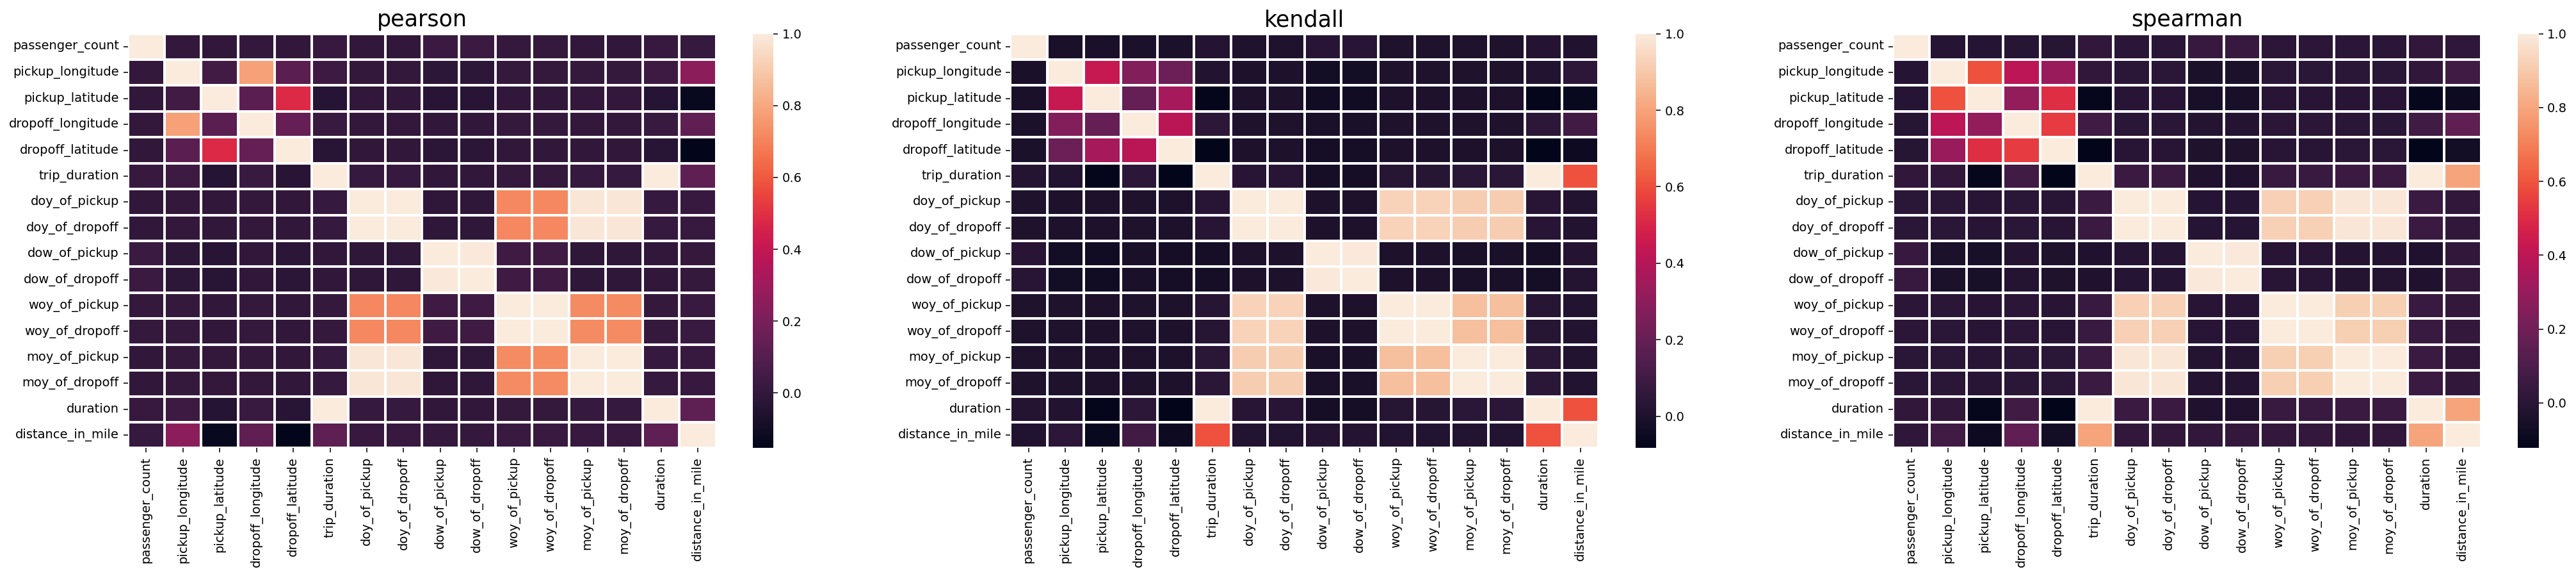

In [56]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical_features.corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

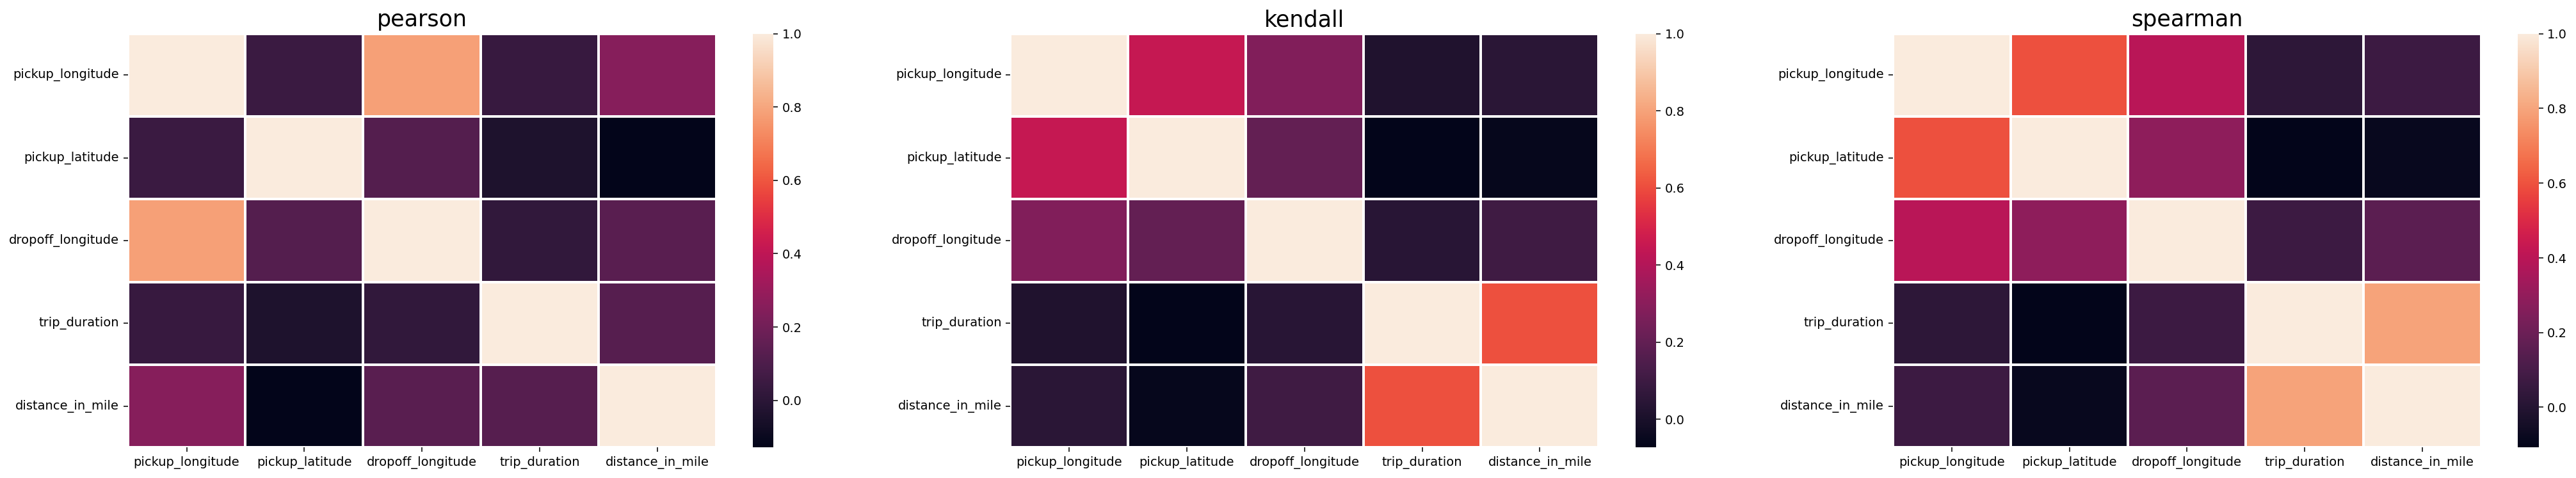

In [57]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical_features[numeric_distance].corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

####  Summary
- There seems no significant correlation observed for the given set of features that are higher than 75% or more

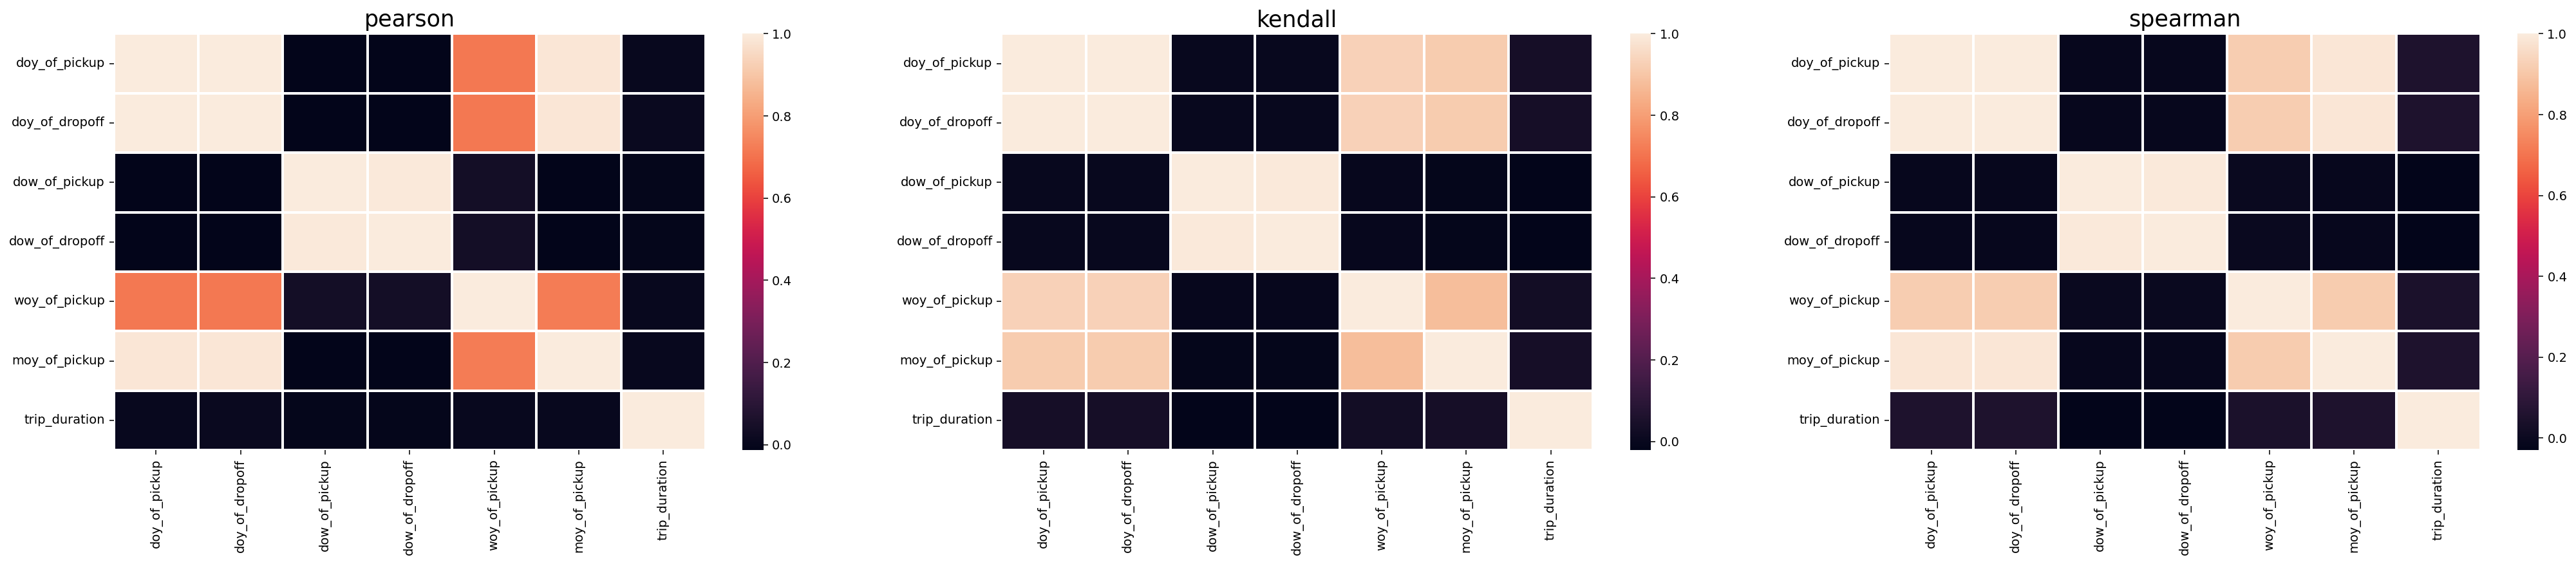

In [58]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical_features[numeric_day_of].corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

####  Summary
- Month of Year and Day of Year seem to be having correlation value higher than 75% 

In [59]:
numerical_features.dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration        float64
doy_of_pickup        float64
doy_of_dropoff       float64
dow_of_pickup        float64
dow_of_dropoff       float64
woy_of_pickup        float64
woy_of_dropoff       float64
moy_of_pickup        float64
moy_of_dropoff       float64
duration             float64
distance_in_mile     float64
dtype: object

<Axes: xlabel='distance_in_mile', ylabel='trip_duration'>

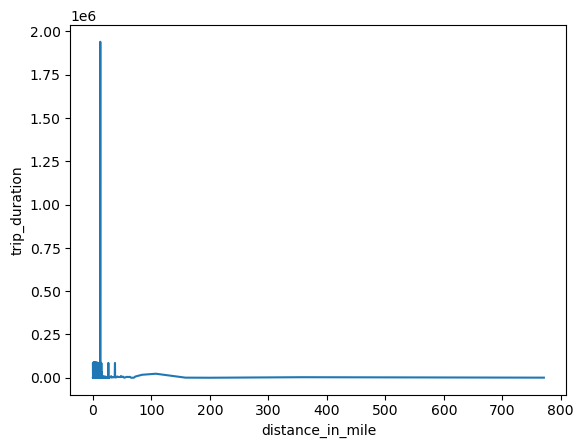

In [61]:
sns.lineplot(data = numerical_features, x = numerical_features['distance_in_mile'], y = numerical_features['trip_duration'] )

####  Summary
- The most trip duration seem to happen within a range of 25 miles
- There are very few instances of trips for higher distances

<Axes: xlabel='passenger_count', ylabel='distance_in_mile'>

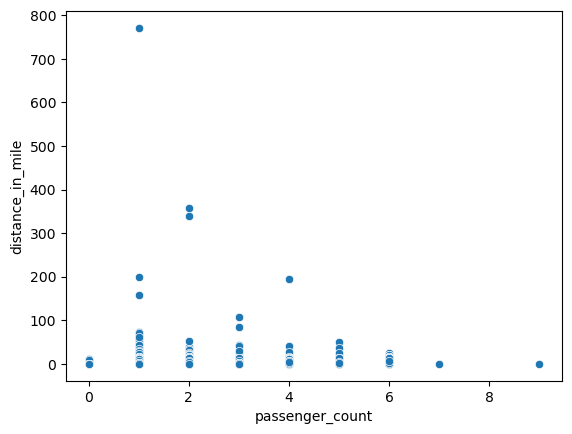

In [203]:
sns.scatterplot(data = numerical_features, x = numerical_features['passenger_count'], y = numerical_features['distance_in_mile'])

####  Summary
- The Passenger Count distribution seems to be mostly around 100 miles
- The Passenger count find fewer in numbers for 150 miles or more
- The Passenger distribution is significantly distributed below 4. The distribution lowers as increase in count

<Axes: xlabel='vendor_id', ylabel='passenger_count'>

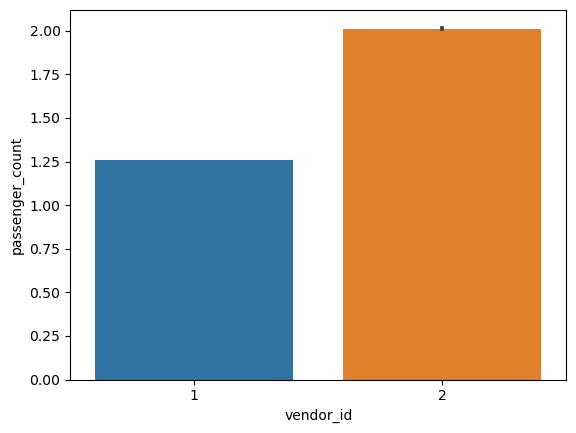

In [63]:
sns.barplot(data = nyc_taxi_trip_df, x = nyc_taxi_trip_df['vendor_id'], y = nyc_taxi_trip_df['passenger_count'] )

####  Summary
- The Vendor 2 have higher passenger counts

<Axes: xlabel='vendor_id', ylabel='distance_in_mile'>

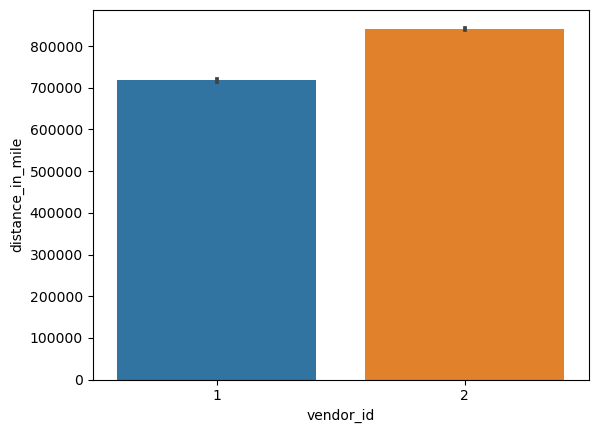

In [65]:
sns.barplot(data = nyc_taxi_trip_df, x = nyc_taxi_trip_df['vendor_id'], y = nyc_taxi_trip_df['distance_in_mile'], estimator = 'sum')

####  Summary
- The Vendor ID 2 is having higher Distance in mile

In [74]:
nyc_taxi_trip_df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                float64
doy_of_pickup                float64
doy_of_dropoff               float64
dow_of_pickup                float64
dow_of_dropoff               float64
day_of_pickup               category
day_of_dropoff              category
woy_of_pickup                float64
woy_of_dropoff               float64
is_pickup_weekday           category
is_dropoff_weekday          category
moy_of_pickup                float64
moy_of_dropoff               float64
moy_pickup_short            category
moy_dropoff_short           category
year_pickup                 category
year_mon_pickup               object
d

In [111]:
trip_grp = nyc_taxi_trip_df.groupby(['vendor_id', 'day_of_pickup', 'year_mon_pickup', 'year_pickup' ])
trip_grp

In [112]:
trip_grp_num_of_trips = trip_grp['id'].count()
trip_grp_num_of_trips = trip_grp_num_of_trips.reset_index()
trip_grp_num_of_trips.rename(columns = {'id': 'Num_of_Trips'}, inplace = True)
trip_grp_num_of_trips.sort_values(by = ['Num_of_Trips'], ascending = True, inplace = True)
trip_grp_num_of_trips.head()

,vendor_id,day_of_pickup,year_mon_pickup,year_pickup,Num_of_Trips
6,1,Monday,20161,2016,6237
11,1,Monday,20166,2016,6705
23,1,Sunday,20166,2016,6771
30,1,Tuesday,20161,2016,6850
8,1,Monday,20163,2016,6962


<Axes: xlabel='Num_of_Trips', ylabel='day_of_pickup'>

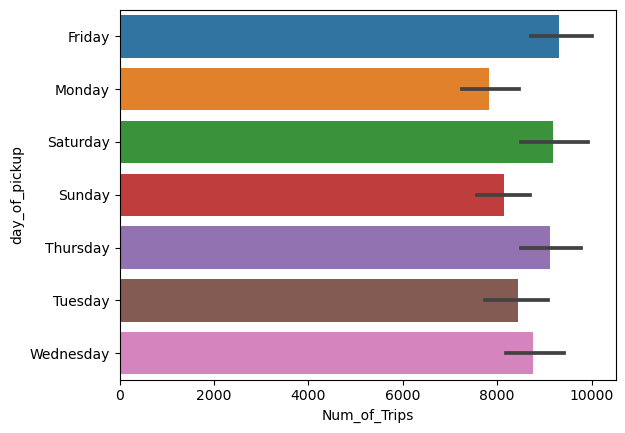

In [113]:
sns.barplot(data = trip_grp_num_of_trips, y = 'day_of_pickup', x = 'Num_of_Trips')

####  Summary
- The highest Number of Trips seem to happen on Friday
- There is no significant drop in Number of Trips for the weekend

In [114]:
trip_grp_num_of_trips = trip_grp['id'].count()
trip_grp_num_of_trips = trip_grp_num_of_trips.reset_index()
trip_grp_num_of_trips.rename(columns = {'id': 'Num_of_Trips'}, inplace = True)
trip_grp_num_of_trips.sort_values(by = ['Num_of_Trips'], ascending = True, inplace = True)
trip_grp_num_of_trips.head()

,vendor_id,day_of_pickup,year_mon_pickup,year_pickup,Num_of_Trips
6,1,Monday,20161,2016,6237
11,1,Monday,20166,2016,6705
23,1,Sunday,20166,2016,6771
30,1,Tuesday,20161,2016,6850
8,1,Monday,20163,2016,6962


<Axes: xlabel='year_mon_pickup', ylabel='Num_of_Trips'>

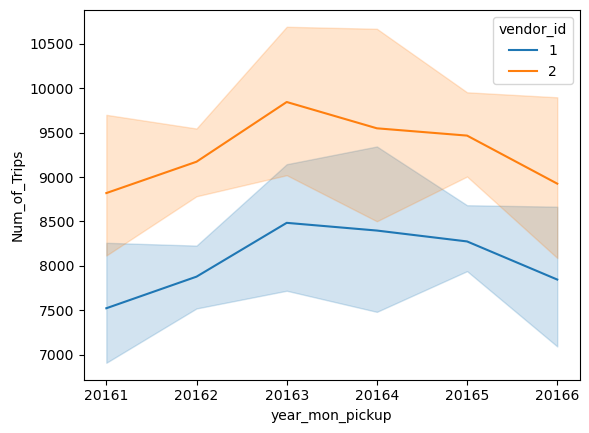

In [115]:
trip_grp_num_of_trips = trip_grp_num_of_trips.sort_values(by = ['year_mon_pickup'])
sns.lineplot(data =trip_grp_num_of_trips, x = 'year_mon_pickup', y = 'Num_of_Trips', hue = 'vendor_id')

####  Summary
- The Number of Trips is highest for March and then gradually decreses for May and June
- The Vendor ID 2 seems to have higher Number of Trips

In [116]:
trip_grp_trip_duration = trip_grp['trip_duration'].mean()
trip_grp_trip_duration = trip_grp_trip_duration.reset_index()
trip_grp_trip_duration.head()

,vendor_id,day_of_pickup,year_mon_pickup,year_pickup,trip_duration
0,1,Friday,20161,2016,795.167794
1,1,Friday,20162,2016,818.984662
2,1,Friday,20163,2016,842.945627
3,1,Friday,20164,2016,888.058829
4,1,Friday,20165,2016,924.257835


<Axes: xlabel='day_of_pickup', ylabel='trip_duration'>

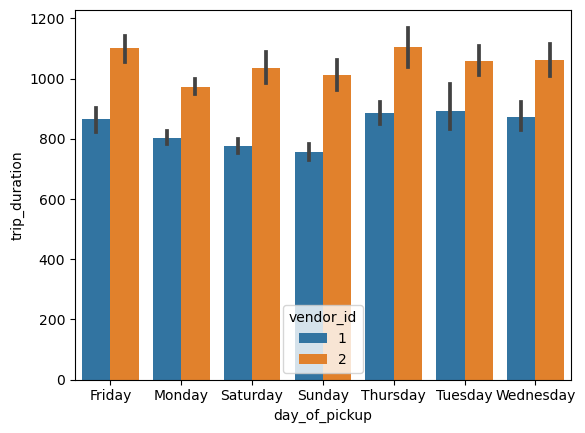

In [117]:
trip_grp_trip_duration = trip_grp_trip_duration.sort_values(by = ['day_of_pickup'])
sns.barplot(data = trip_grp_trip_duration, x = 'day_of_pickup', y = 'trip_duration', hue = 'vendor_id')

####  Summary
- The Vendor ID 2 is having higher Trip Durations
- The Trip Duration seems to have the highest on Friday and followed by Thursday

In [118]:
trip_grp_distance = trip_grp['distance_in_mile'].mean()
trip_grp_distance = trip_grp_distance.reset_index()
trip_grp_distance.head()

,vendor_id,day_of_pickup,year_mon_pickup,year_pickup,distance_in_mile
0,1,Friday,20161,2016,2.073123
1,1,Friday,20162,2016,2.020905
2,1,Friday,20163,2016,2.132569
3,1,Friday,20164,2016,2.140214
4,1,Friday,20165,2016,2.100794


<Axes: xlabel='year_mon_pickup', ylabel='distance_in_mile'>

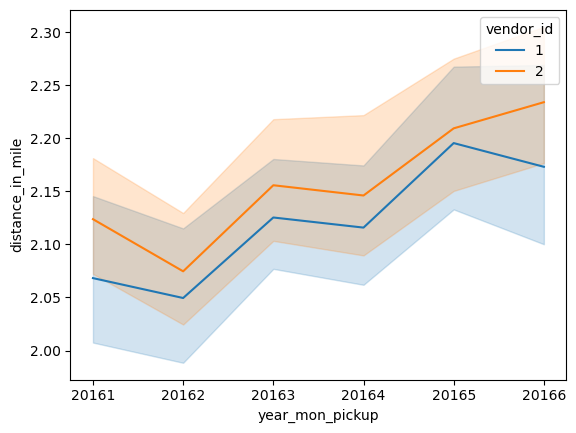

In [119]:
trip_grp_distance = trip_grp_distance.sort_values(by = ['year_mon_pickup'])
sns.lineplot(data =trip_grp_distance, x = 'year_mon_pickup', y = 'distance_in_mile', hue = 'vendor_id')

####  Summary
- The Miles covered is almost increasing by given month especially for Vendor ID 2
- The Miles covered show some dip after May for Vendor ID 1

In [120]:
trip_grp_trip_day = nyc_taxi_trip_df.groupby(['vendor_id', 'is_pickup_weekday', 'store_and_fwd_flag'])
trip_grp_trip_day

In [126]:
trip_grp_distance = trip_grp_trip_day['distance_in_mile'].sum()
trip_grp_distance = trip_grp_distance.reset_index()
trip_grp_distance

,vendor_id,is_pickup_weekday,store_and_fwd_flag,distance_in_mile
0,1,N,N,205450.946830
1,1,N,Y,3155.100215
2,1,Y,N,499932.345336
3,1,Y,Y,9575.528502
4,2,N,N,245281.403661
5,2,N,Y,0.000000
6,2,Y,N,596060.942289
7,2,Y,Y,0.000000


<Axes: xlabel='is_pickup_weekday', ylabel='distance_in_mile'>

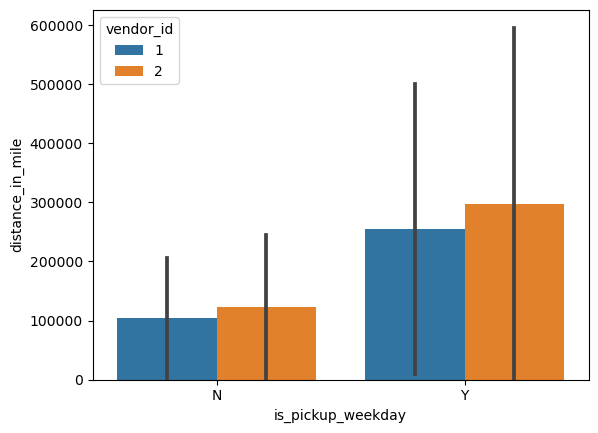

In [127]:
sns.barplot(data = trip_grp_distance, x = 'is_pickup_weekday', y = 'distance_in_mile', hue = 'vendor_id')

####  Summary
- The Vendor ID 2 is having higher Distance in Mile
- The Distance in Mile seems to be almost similar for both Weekdays and Weekend

<Axes: xlabel='store_and_fwd_flag', ylabel='distance_in_mile'>

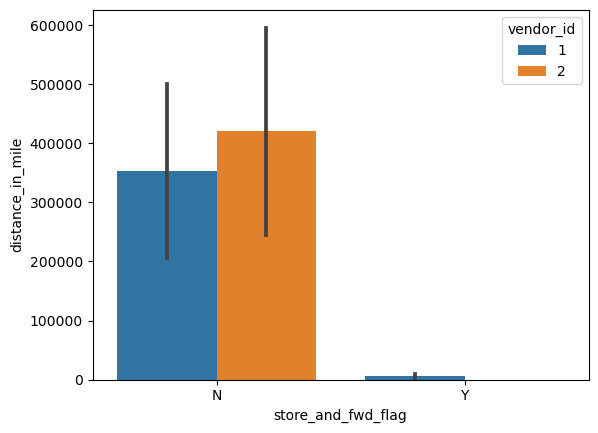

In [128]:
sns.barplot(data = trip_grp_distance, x = 'store_and_fwd_flag', y = 'distance_in_mile', hue = 'vendor_id')

####  Summary
- The Vendor ID 2 is only having Store and Forward Flag as Yes
- The most of the distance covered are not stored for both vendors.

In [133]:
trip_grp_dist_range = nyc_taxi_trip_df.groupby(['vendor_id', 'year_mon_pickup', 'distance_range'])
trip_grp_dist_range = trip_grp_dist_range['distance_in_mile'].sum()
trip_grp_dist_range = trip_grp_dist_range.reset_index()
trip_grp_dist_range.head()

,vendor_id,year_mon_pickup,distance_range,distance_in_mile
0,1,20161,Local,108799.491549
1,1,20161,Long-Range,0.000000
2,1,20161,Mid-Range,0.000000
3,1,20161,Short-Range,63.216091
4,1,20162,Local,112589.287420


<Axes: xlabel='distance_range', ylabel='distance_in_mile'>

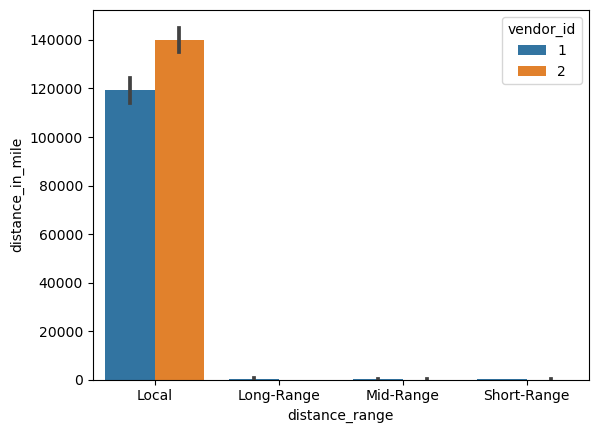

In [134]:
sns.barplot(data = trip_grp_dist_range, x = 'distance_range', y = 'distance_in_mile', hue = 'vendor_id')

####  Summary
- The Distance in mile covered is most through Local Range
= The Vendor ID 2 covers higher local range
- The rest of the Distance ranges have significantly low distance in mile 

In [136]:
!pip install shapely

In [137]:
import folium

# # create tuples representing our location
# pickup_location = float(40.778873), float(-73.953918)
# dropoff_location = float(40.771164), float(-73.963875)

# print(pickup_location, dropoff_location)
# center the map at New York Penn Station
newyork = (40.75296592201384, -73.977183988487)

#create a Folium map centred at the above location
m = folium.Map(location=newyork, zoom_start=16, width=1200, height=800)

for index, row in nyc_taxi_trip_df.iterrows():
    #add marker at the locations 
    pickup_location  = row['pickup_latitude'],  row['pickup_longitude']
    dropoff_location = row['dropoff_latitude'], row['dropoff_longitude']
    
    folium.Marker(pickup_location, popup = row[['id', 'store_and_fwd_flag', 'store_and_fwd_flag', 'trip_duration']]).add_to(m)
    folium.Marker(dropoff_location, popup = row[['id', 'store_and_fwd_flag', 'store_and_fwd_flag', 'trip_duration']]).add_to(m)

    # add line between points
    folium.PolyLine((pickup_location, dropoff_location)).add_to(m)

    if index > 100:
        break

m